In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Data',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=108,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 18073 files belonging to 4 classes.
Using 14459 files for training.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Data',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=108,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 18073 files belonging to 4 classes.
Using 3614 files for validation.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
  print(x.shape)
  print(y.shape)
  break

(108, 128, 128, 3)
(108, 4)


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 4051s 30s/step - accuracy: 0.7512 - loss: 0.7439 - val_accuracy: 0.7847 - val_loss: 0.5245
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 118s 471ms/step - accuracy: 0.7874 - loss: 0.5393 - val_accuracy: 0.7986 - val_loss: 0.4703
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 63s 469ms/step - accuracy: 0.8281 - loss: 0.4199 - val_accuracy: 0.8525 - val_loss: 0.3511
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 71s 387ms/step - accuracy: 0.8914 - loss: 0.2829 - val_accuracy: 0.9192 - val_loss: 0.2088
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 63s 470ms/step - accuracy: 0.9538 - loss: 0.1305 - val_accuracy: 0.9638 - val_loss: 0.1004


In [ ]:
#Trainin set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print("Training Accuracy: ", train_acc)

134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 334ms/step - accuracy: 0.9878 - loss: 0.0419
Training Accuracy:  0.9892800450325012


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print("Validation Accuracy: ", val_acc)

34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 309ms/step - accuracy: 0.9623 - loss: 0.0993
Validation Accuracy:  0.9637520909309387


In [ ]:
cnn.save('AlzDetect_Model.keras')

In [ ]:
training_history.history

{'accuracy': [0.774050772190094,
  0.7939691543579102,
  0.8411369919776917,
  0.9101597666740417,
  0.9609931707382202],
 'loss': [0.6351888179779053,
  0.5130024552345276,
  0.38955309987068176,
  0.24147045612335205,
  0.11342232674360275],
 'val_accuracy': [0.784726083278656,
  0.798561155796051,
  0.8525179624557495,
  0.9192031025886536,
  0.9637520909309387],
 'val_loss': [0.5244928598403931,
  0.47034531831741333,
  0.3510764539241791,
  0.20881910622119904,
  0.10037583857774734]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


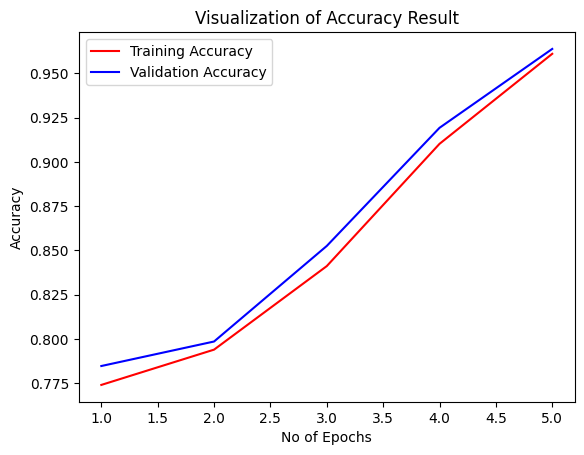

In [ ]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Visualization of Accuracy Result')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names

In [ ]:
y_pred = cnn.predict(validation_set)
predicted_categories = tf.argmax(y_pred, axis=1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 297ms/step


In [ ]:
true_categories = tf.concat([y for x, y in validation_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(3614,), dtype=int64, numpy=array([2, 2, 3, ..., 2, 2, 2])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(3614,), dtype=int64, numpy=array([3, 2, 2, ..., 2, 3, 2])>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)

In [ ]:
#Precision Recall Fscore
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                    precision    recall  f1-score   support

     Mild Dementia       0.05      0.07      0.06       212
 Moderate Dementia       0.00      0.00      0.00        16
      Non Demented       0.78      0.78      0.78      2819
Very mild Dementia       0.15      0.14      0.14       567

          accuracy                           0.63      3614
         macro avg       0.24      0.24      0.24      3614
      weighted avg       0.63      0.63      0.63      3614

